In [1]:
import sys
sys.path.append("..")
from MLSR.data import *
#x = DataSet.do_nation_policy(data)
#y = DataSet.do_income(data)
x = DataSet('../data/rand_select_400_avg.csv')
x.generate_feature()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.576 seconds.
Prefix dict has been built successfully.


In [2]:
x.features_name

{'f0': '建档立卡贫困户',
 'f1': '城乡低保户',
 'f2': '五保户',
 'f3': '孤残学生',
 'f4': '军烈属或优抚子女',
 'f5': '经商',
 'f6': '务农',
 'f7': '退休',
 'f8': '低保',
 'f9': '打工',
 'f10': '父母均下岗',
 'f11': '父母一方下岗',
 'f12': '家庭人均年收入',
 'f13': '大学',
 'f14': '高中',
 'f15': '义务教育',
 'f16': '祖父母患病',
 'f17': '父母离异',
 'f18': '父亲（母亲）患普通疾病',
 'f19': '父母患普通疾病',
 'f20': '兄弟姐妹患重疾',
 'f21': '父亲（母亲）患重疾',
 'f22': '父母患重疾',
 'f23': '父亲（母亲）去世',
 'f24': '突发重大自然灾害',
 'f25': '助学金个数',
 'f26': '助学金金额',
 'f27': '国助类型',
 'f28': '民族',
 'f29': '家庭人口',
 'f30': '是否贷款',
 'f31': '入学前户口性质'}

In [3]:
y = DataSet('../data/not_selected_avg.csv')
y.generate_feature()
z = DataSet.static_merge(x, y)

In [4]:
z.features['f29'].astype('int64').value_counts(normalize=True, ascending=True)

23    0.000120
14    0.000120
15    0.000120
20    0.000120
16    0.000240
13    0.000240
11    0.000360
12    0.000480
1     0.000601
10    0.001802
9     0.003003
8     0.018616
2     0.044319
7     0.051165
6     0.142806
3     0.181119
5     0.242734
4     0.312035
Name: f29, dtype: float64

In [5]:
from scipy.stats import lognorm
lognorm.ppf(0.5, 27915, 0, 26400)

26400.0

In [6]:
import math
ans_s=0
ans_t=math.inf
for s in [0.0005*i for i in range(2000)]:
    t = lognorm.ppf(0.01, s, 0, 26400)
    delta = math.fabs(t-16700)
    if delta < ans_t:
        ans_s = s
        ans_t = t
ans_s, ans_t

(0.495, 8346.32909204472)

In [7]:
lognorm.ppf(0.01, 0.1892, 0, 26400)

17000.096021839145

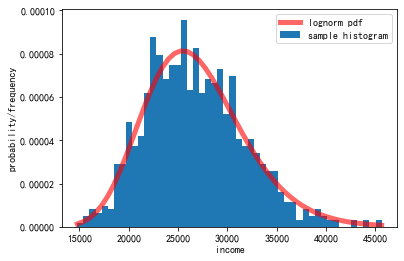

In [8]:
import matplotlib.pyplot as plt
import numpy as np
s = 0.1892
xi = lognorm(s=0.1892, loc=0, scale=26400)
x = np.linspace(xi.ppf(0.01), xi.ppf(0.99), 100)

rr = np.random.lognormal(10.1811, 0.1892, 1000)
count, bins, ignored = plt.hist(rr, 50, density=True, label='sample histogram')
plt.plot(bins, xi.pdf(bins),'r-', lw=5, alpha=0.6, label='lognorm pdf')
plt.legend()
plt.xlabel('income')
plt.ylabel('probability/frequency')
plt.savefig('lognormal.png')

In [9]:
math.log(26400)

10.181119289134408

In [10]:
xxx = np.random.binomial(3, 0.04, 1000)
np.sum(xxx > 0), np.max(xxx)

(105, 2)

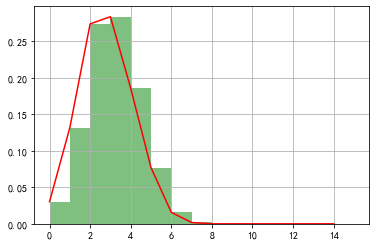

In [11]:
x = np.random.binomial(7, 0.4, size=10000)  # lam为λ size为k
pillar = 15
a = plt.hist(x, bins=pillar, density=True, range=[0, pillar], color='g', alpha=0.5)
plt.plot(a[1][0:pillar], a[0], 'r')
plt.grid()
plt.show()

In [12]:
aug = DataSet.data_augment()
aug.features.head(20)

,f0,f1,f2,f3,f8,f25,f26,f27,f30,f4,...,f22,f23,f24,f28,f29,f31,f5,f7,f9,f6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,1,0,0,1,0


In [13]:
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
m = Pipeline([('scale',MinMaxScaler()),('pca',KernelPCA(10, 'rbf', n_jobs=-1, n_components=None))])
m = m.fit(z.features)

/home/lvzhihao/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass kernel=rbf as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [17]:
m['pca'].__dict__

{'n_components': 10,
 'kernel': 'rbf',
 'kernel_params': None,
 'gamma': None,
 'degree': 3,
 'coef0': 1,
 'alpha': 1.0,
 'fit_inverse_transform': False,
 'eigen_solver': 'auto',
 'remove_zero_eig': False,
 'tol': 0,
 'max_iter': None,
 'random_state': None,
 'n_jobs': -1,
 'copy_X': True,
 'n_features_in_': 32,
 '_centerer': KernelCenterer(),
 'lambdas_': array([202.02981213, 122.67331742, 103.81108297,  91.59351133,
         68.51236841,  62.44361122,  56.23739311,  51.17736871,
         41.42039414,  36.01510502]),
 'alphas_': array([[ 3.06228477e-03, -2.23827083e-02,  7.84225496e-03, ...,
         -3.74377777e-03, -6.28922991e-03,  3.04997819e-02],
        [ 6.46948513e-03,  1.31647580e-02,  5.88821120e-03, ...,
          5.09715382e-03, -7.44752805e-03, -2.29286718e-03],
        [ 1.26226018e-02, -7.41079201e-03,  7.91250398e-03, ...,
          2.64775347e-02, -3.37440524e-03,  4.33416182e-03],
        ...,
        [-1.27775830e-02,  7.24466072e-03, -8.90994764e-03, ...,
         

‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’, ‘precomputed’